In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter

In [2]:
from matplotlib.colors import LinearSegmentedColormap

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):

    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

### Performance matrix

In [3]:
perf = np.load('/Users/GA/Documents/Dayan_lab/Optimism_And_Pessimism_In_Optimised_Replay/Code/Task/contours/Archive/perf_matrix_two.npy')
perf = gaussian_filter(perf, 1.5)
hex_list = ['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D'][::-1]

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 6 Text yticklabel objects>)

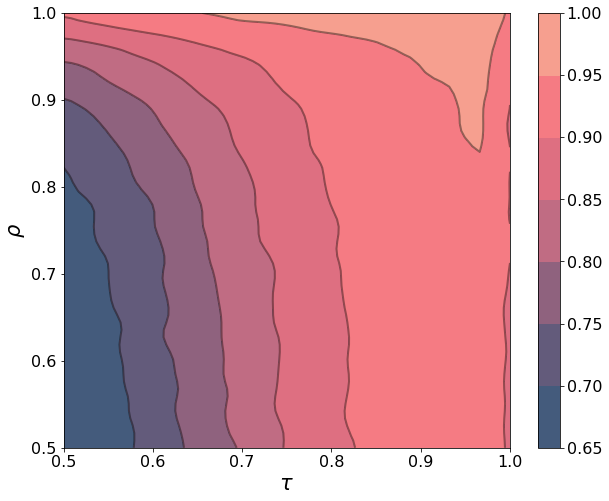

In [4]:
fig = plt.figure(figsize=(10, 8))

x = np.linspace(0.5, 1, 60)
y = np.linspace(0.5, 1, 60)

X, Y = np.meshgrid(y, x)

plt.contourf(X, Y, perf, 6, cmap=get_continuous_cmap(hex_list))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.contour(X, Y, perf, 6, colors=['k']*7, linewidths=2, alpha=0.4)
plt.xlabel(r'$\tau$', fontsize=21);
plt.ylabel(r'$\rho$', fontsize=21);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title(r'Steady-state performace. $\beta=1.5, \alpha=0.62$', fontsize=20)
# plt.savefig('/Users/GA/Documents/Dayan_lab/Paper/Figures_data/Figure2/Performace.svg', format='svg', transparent=True)

### Pessimism bias matrix

In [89]:
root_folder = '/Users/GA/Documents/Dayan_lab/Optimism_And_Pessimism_In_Optimised_Replay/Code/Task/contours/rat_matrix'

n = 2
tmp = np.zeros((n, 80))

for i in range(n):
    z = np.load(os.path.join(root_folder, 'rat_matrix_%u.npy'%i))
    tmp[i, :] = z

In [90]:
# bias = tmp
bias = gaussian_filter(tmp, 1.5)

In [92]:
np.linspace(0.5, 1, 80)[n]

0.5126582278481012

(array([0.5   , 0.5025, 0.505 , 0.5075, 0.51  , 0.5125, 0.515 , 0.5175,
        0.52  ]),
 <a list of 9 Text yticklabel objects>)

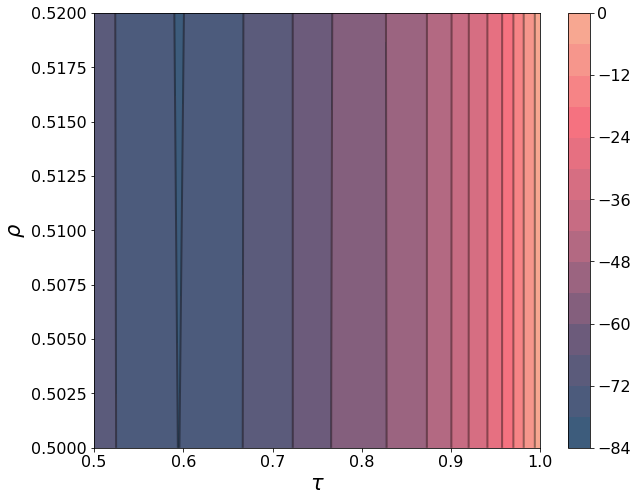

In [94]:
fig = plt.figure(figsize=(10, 8))

x = np.linspace(0.5, 0.52, n)
y = np.linspace(0.5, 1, 80)

X, Y = np.meshgrid(y, x)

k = 12
plt.contourf(X, Y, bias, k, cmap=get_continuous_cmap(hex_list))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.contour(X, Y, bias, k, colors=['k']*k, linewidths=2, alpha=0.4)
plt.xlabel(r'$\tau$', fontsize=21);
plt.ylabel(r'$\rho$', fontsize=21);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title(r'Steady-state performace. $\beta=1.5, \alpha=0.62$', fontsize=20)
# plt.savefig('/Users/GA/Documents/Dayan_lab/Paper/Figures_data/Figure2/Performace.svg', format='svg', transparent=True)

In [95]:
bias

array([[-70.44268036, -70.4371167 , -70.36811335, -70.7949818 ,
        -72.10276123, -73.72823195, -74.9854279 , -75.74549002,
        -76.11910245, -76.24375786, -76.36044871, -76.64013697,
        -77.07826869, -77.56729806, -77.91713345, -78.01490978,
        -77.89710916, -77.6127145 , -77.16296654, -76.55268991,
        -75.85853776, -75.13222912, -74.33214627, -73.53920131,
        -72.95158322, -72.5759654 , -72.20172611, -71.59453618,
        -70.66252993, -69.59920042, -68.73657849, -68.2278904 ,
        -67.98075704, -67.72416039, -67.16005199, -66.21350872,
        -65.06832822, -63.96603495, -63.00111444, -62.11327799,
        -61.26356396, -60.51721065, -59.98899432, -59.74062882,
        -59.64221554, -59.40331809, -58.8519027 , -58.04682129,
        -57.10032991, -56.11558964, -55.23165436, -54.51040486,
        -53.86460793, -53.19402448, -52.48791553, -51.74193467,
        -50.92374805, -50.03613025, -49.04880041, -47.90461281,
        -46.67674289, -45.45984955, -44.